# Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from scipy.sparse import dok_matrix
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()


In [2]:
warn()

# Defining Helper Functions
This function will print the class and document dataframe 

In [4]:
def print_sample_and_class(data, class_=1,n_samples=5):

    index=data[data['y']==class_]['X'].index[0:n_samples]

    for i in index:
        print("sample {} of class {}".format(i,class_))
        print(data[data['y']==class_]['X'][i])

# Dataset

In [5]:
df=  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X'])
df.head()

,y,X
0,1,The Rock is destined to be the 21st Century '...
1,1,The gorgeously elaborate continuation of `` T...
2,1,Singer\/composer Bryan Adams contributes a sl...
3,0,You 'd think by now America would have had en...
4,1,Yet the act is still charming here .


In [6]:

print_sample_and_class(df, class_=1,n_samples=5)

sample 0 of class 1
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
sample 1 of class 1
 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
sample 2 of class 1
 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
sample 4 of class 1
 Yet the act is still charming here .
sample 5 of class 1
 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .


In [7]:
my_string=df['X'][0]
print("document:",my_string)
print("\n type:",type(my_string))

document:  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

 type: <class 'str'>


# We can print out the first 10 characters

In [8]:
my_string[0:10]

' The Rock '

# We can split the string into a individual of words, each word is called a token

In [9]:
my_string.split()

['The',
 'Rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'Century',
 "'s",
 'new',
 '``',
 'Conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'Arnold',
 'Schwarzenegger',
 ',',
 'Jean-Claud',
 'Van',
 'Damme',
 'or',
 'Steven',
 'Segal',
 '.']

In [10]:
my_string.casefold()

" the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."

In [11]:
df["X"].str.casefold()

0        the rock is destined to be the 21st century '...
1        the gorgeously elaborate continuation of `` t...
2        singer\/composer bryan adams contributes a sl...
3        you 'd think by now america would have had en...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541     we 've seen the hippie-turned-yuppie plot bef...
8542     her fans walked out muttering words like `` h...
8543                                  in this case zero .
Name: X, Length: 8544, dtype: object

In [12]:
 # Count the number of "good words" and "bad words" in the text
good_words = ['love', 'good','excellent', 'great','charming']


bad_words = ['hate', 'bad','brutal', 'damnable', 'deplorable', 'detestable', 'disastrous', 'dreadful']

In [13]:
df["score"]=0
for bad_word in bad_words:
    df["score"]-=df["X"].str.casefold().str.count(bad_word)

In [17]:

for good_words in good_words:
    df["score"]+=df["X"].str.casefold().str.count(good_words)

# We are giving each word a score, one for a positive sentiment word and a negative one for negative sentiment word.

In [15]:
df.head()

,y,X,score
0,1,The Rock is destined to be the 21st Century '...,1
1,1,The gorgeously elaborate continuation of `` T...,0
2,1,Singer\/composer Bryan Adams contributes a sl...,0
3,0,You 'd think by now America would have had en...,0
4,1,Yet the act is still charming here .,1


we can print out the document with the highest score:

In [16]:
df.loc[df["score"].argmax(axis=0),'X']

' Good fun , good action , good acting , good dialogue , good pace , good cinematography .'

we can also print out the document with the lowest score:


In [18]:
df.loc[df["score"].argmin(axis=0),'X']

' Wow .'


We calculate the score for positive and negative and neural classes




In [19]:
df.groupby('y').mean()

,score
y,
-1,32.953776
0,31.834975
1,35.484765


we see that the scores are relatively the same. We can also plot a histogram we see for each class most of the samples overlap.


y
-1    AxesSubplot(0.125,0.11;0.775x0.77)
 0    AxesSubplot(0.125,0.11;0.775x0.77)
 1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: score, dtype: object

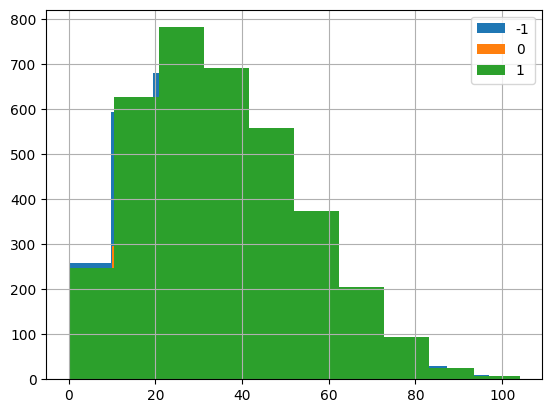

In [20]:
df[["score","y"]].groupby('y')["score"].hist(legend=True)

In [22]:
df['yhat']=0


We can set rule-based thresholds if the score is less than the threshold; we set the sentiment to positive sentiment; similarly, if it's less than the negative of the threshold, we set the sentiment to negative. Anything between we set to neutral. In this case, the threshold is one; you can try different values for thresholds or different rules on your own ;

In [23]:
negative_label=df[['score']].sum(axis=1)<1
pos_label=df[['score']].sum(axis=1)>-1

We assign the class according the the score:

In [24]:
df['yhat'][negative_label]=-1
df['yhat'][pos_label]=1

In [25]:
df['y'].value_counts()

 1    3610
-1    3310
 0    1624
Name: y, dtype: int64

# We compare the predicted sentiment with the actual  sentiment, we see the accuracy is not good

In [26]:
np.mean(df['yhat']==df['y'])

0.4225187265917603

There are many reasons why the rule based classifier did not work. The list of words was small the datasets can have thousands of words both positive and negative words; also  we dint have any neutral words. Are scoring methods we use gives a  one for a  positive sentiment word and a negative one for negative sentiment word, maybe some words should be grater then one for  positive sentiment like "amazing" should be 10 and ok  should be 4, similarly some words with negative  sentiment should have large negative values like "barfed " should be "-10" and "boring" should be -4. Maybe  neutral and negative words may have a score for positive sentiment and vise versa. One way to answer these questions is to use machine learning to determine these these scores. 


In [27]:
train_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
validation_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/dev.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
test_dataset =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/test.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 

Training data set A training data set is a data set of examples used during the learning process and is used to fit the parameters (e.g., weights or scores )

Validation data set A validation data set is a data-set of examples used to tune the hyperparameters these are related to the learning training and are chose by experimenting

Test data set A test data set is a data set that is independent of the training data set and Validation , it basicly how good you model should do in the real world

# Bag-Of-Words 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
 corpus = [
    'This is the first of document .',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?' ]

In [30]:
vectorizer=CountVectorizer()

X_toy = vectorizer.fit_transform(corpus)
X_toy 

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

we can output the word corresponding to each column

In [31]:
vectorizer. get_feature_names()

['and',
 'document',
 'first',
 'is',
 'of',
 'one',
 'second',
 'the',
 'third',
 'this']

we can cast the output to a numpy array 

In [32]:
X_toy.toarray()

array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [33]:
original_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
original_toy_df

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


# Training a Model with Grid Search and Logistic Regression

In [34]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
dataset=pd.concat([train_dataset,validation_dataset],axis=0)

In [36]:
from sklearn.model_selection import PredefinedSplit

split_index = [-1]*train_dataset.shape[0] + [0]*validation_dataset.shape[0]
pds = PredefinedSplit(test_fold = split_index)

In [37]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['X'])
y=dataset['y']

In [38]:
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

In [39]:
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

In [40]:
clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

We fit the model and print out the highest accuracy in the validation data and the corresponding best parameter:

In [41]:
clf.fit(X, y)
print("highest accuracy in the validation accuracy ",clf.best_score_)
print("best hyperparameters:",clf.best_params_)


highest accuracy in the validation accuracy  0.6194368755676658
best hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2'}



We also find the accuracy using the test data we see it's much higher than the validation data:

In [42]:
print(" best parameters accuracy score :",clf.score(X_test,y_test))

 best parameters accuracy score : 0.6502262443438914


we can find the best model

In [43]:
model=clf.best_estimator_

and make a prediction 

In [44]:
model.predict(X_test)

array([ 0,  1,  1, ...,  1, -1, -1], dtype=int64)

In [48]:
feature_importance=np.argsort(model.coef_)

In [49]:
for class_ in range(3):
    
    print("(j) or y=",class_)
    print(np.array(vectorizer.get_feature_names())[feature_importance[class_,0:10]])
   

(j) or y= 0
['solid' 'powerful' 'enjoyable' 'best' 'hilarious' 'fun' 'perfectly'
 'charming' 'always' 'human']
(j) or y= 1
['offers' 'screen' 'imagine' 'thoroughly' 'crafted' 'impressive' 'going'
 'frequently' 'watching' 'four']
(j) or y= 2
['suffers' 'dull' 'worst' 'mess' 'too' 'unfortunately' 'lack' 'less'
 'plain' 'bad']


# Bag-Of-Word Hyperparameters

Bag-Of-Word has several hyperparameters you can change to improve performance; most have to do with reducing the number of dimensions in the TDM this improves performance, lets review some

Stop words, which include "and," "the," and "his," are seen to be uninformative in describing the content of a document and may be eliminated sometimes to improve performance. However, removing stop words does not always help with performance, so the validation data should be used to determine their effectiveness

In [50]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UseR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
print(stopwords.words('english')[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [52]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_toy = vectorizer.fit_transform(corpus)

In [53]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()


,document,first,one,second,third
This is the first of document .,1,1,0,0,0
This document is the second document.,2,0,0,1,0
And this is the third one.,0,0,1,0,1
Is this the first document?,1,1,0,0,0


In [54]:
original_toy_df.head()

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


The next parameter is ```min_df```, which has been set to 5. This corresponds to the minimum number of documents that should contain this feature to be counted. Here we set ```min_df``` to two; this means at least two documents contain the word if it's to be included as a column in the TFM. The reasoning is that if very few documents have the word, it will just add an extra dimension to the TFM  and not be useful for classification. Let's apply it to our toy example and compare it to our original TFM 


In [55]:
min_df=2
vectorizer = CountVectorizer(min_df=min_df)
X_toy = vectorizer.fit_transform(corpus)

In [56]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,document,first,is,the,this
This is the first of document .,1,1,1,1,1
This document is the second document.,2,0,1,1,1
And this is the third one.,0,0,1,1,1
Is this the first document?,1,1,1,1,1


In [57]:
original_toy_df.head()

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [58]:
max_df=0.75
vectorizer = CountVectorizer(max_df=0.75)
X_toy = vectorizer.fit_transform(corpus)


In [59]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,and,document,first,of,one,second,third
This is the first of document .,0,1,1,1,0,0,0
This document is the second document.,0,2,0,0,0,1,0
And this is the third one.,1,0,0,0,1,0,1
Is this the first document?,0,1,1,0,0,0,0


# CountVectorizer Gridserch

We see the ``` CountVectorizer``` has its own set of hyperparameters. We can use ```GridserchCV``` to find them by first creating a pipeline  object. The pipeline object  Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline is a ``` CountVectorizer```,the final estimator


In [60]:
from sklearn.pipeline import Pipeline

In [61]:
pipe = Pipeline(steps=[("CV", CountVectorizer()),  ("LR", LogisticRegression())])

In [62]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}


In [63]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...]],
                         'LR__penalty': ['l1', 'l2']})

In [64]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...]],
                         'LR__penalty': ['l1', 'l2']})

In [65]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.5967302452316077
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['i'], 'LR__penalty': 'l2'}


In [66]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.639366515837104


# Term Frequency–Inverse Document Frequency (TF–IDF)

In [67]:
 corpus

['This is the first of document .',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [68]:
vectorizer=CountVectorizer()
X_toy = vectorizer.fit_transform(corpus)

In [69]:
tf_dataframe=pd.DataFrame(X_toy.toarray(),index=corpus,columns=vectorizer.get_feature_names())
tf_dataframe

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
pd.DataFrame(TfidfTransformer().fit_transform(tf_dataframe).toarray(),index=corpus,columns=vectorizer.get_feature_names())


,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0.000000,0.378357,0.467346,0.309332,0.592769,0.000000,0.000000,0.309332,0.000000,0.309332
This document is the second document.,0.000000,0.687624,0.000000,0.281089,0.000000,0.000000,0.538648,0.281089,0.000000,0.281089
And this is the third one.,0.511849,0.000000,0.000000,0.267104,0.000000,0.511849,0.000000,0.267104,0.511849,0.267104
Is this the first document?,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.000000,0.384085,0.000000,0.384085


# TF–IDF for Sentiment Analysis

We can calculate  TF–IDF using the dataframe directly using ```TfidfVectorizer``` and then train a classifier. Many of the parameters are the same; let's create a pipeline object 


In [72]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
pipe = Pipeline(steps=[("CV", TfidfVectorizer()),  ("LR", LogisticRegression())])

In [74]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}

In [75]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...]],
                         'LR__penalty': ['l1', 'l2']})

In [76]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...]],
                         'LR__penalty': ['l1', 'l2']})

In [79]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.6303360581289736
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['i'], 'LR__penalty': 'l2'}


In [78]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6579185520361991
